In [9]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import math

In [31]:
#reads in a txt file to grab the log2fold change and adj p value. Stores them in dictionary

file = open('S3_TCM_vs_R3_TCM.txt')

data_dictionary = {} #{genesymbol : [log2fold, adj P]}

header = file.readline()
for line in file:
    line = line.strip().split()
    data_dictionary[line[1]] = [float(line[4]), float(line[8])]

file.close()

In [32]:
#THIS DOES NOT READ IN TOP P-VALUES OR ANYTHING ELSE

#for adjusting colors on the plot
#bin each x/y value based off the adjusted p-value or fold change being greater than specified value

#SET THE CUTOFFS
foldchange_cutoff = 0.5
adjp_cutoff = 0.05

#lists for insignificant values
x_notsig = []
y_notsig = []
#lists for significant adj p and big enough fold change
x_adj = []
y_adj = []
#lists for significant adj p but insignificant fold change
x_lowfold = []
y_lowfold = []


for i in data_dictionary:
    #if the adj-pvalue >= 0.05
    if data_dictionary[i][1] <= adjp_cutoff: 
        #if the fold change is significant  
        if data_dictionary[i][0] >= foldchange_cutoff or data_dictionary[i][0] <= -foldchange_cutoff:
            x_adj.append(data_dictionary[i][0])
            y_adj.append(-math.log10(data_dictionary[i][1]))
        #if fold change is not significant 
        else:
            x_lowfold.append(data_dictionary[i][0])
            y_lowfold.append(-math.log10(data_dictionary[i][1]))
    #if the adj p is not significant
    elif data_dictionary[i][1] > adjp_cutoff:
        x_notsig.append(data_dictionary[i][0])
        y_notsig.append(-math.log10(data_dictionary[i][1]))

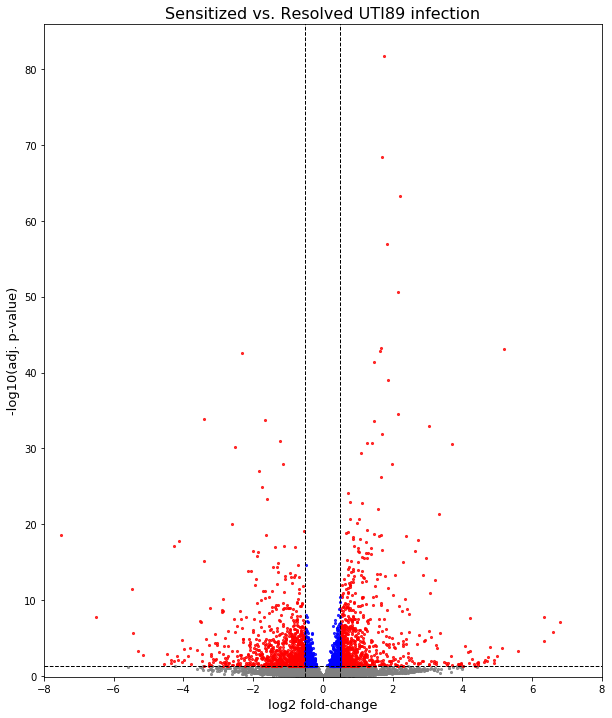

In [33]:
%matplotlib inline

#get the -log10 for the lines
log10_adjp_cutoff = -math.log10(adjp_cutoff)

#group the data from the lists into tuples
g1 = (x_notsig, y_notsig)
g2 = (x_adj, y_adj)
g3 = (x_lowfold, y_lowfold)
#group that data into a tuple and define the colors for each
data = (g1, g2, g3)
colors = ('grey', 'red', 'blue')
#plt the figure
fig = plt.figure(figsize=(10,12)) #figsize(width,height)
#?
ax = fig.add_subplot(1, 1, 1)
#loop through the data and colors ploting each
for data, color, in zip(data, colors):
    x, y = data
    ax.scatter(x, y, s=4.5, alpha=0.8, c=color) #s=size 

#setup the lines for boundaries
adjp_line = mlines.Line2D([-8, 8], [log10_adjp_cutoff, log10_adjp_cutoff], linewidth=1, linestyle='--', color='black') #mlines.Line2D ([x1, x2], [y-inc at x1, y-inc at x2]) x1 and x2 should be the xlims for this use
foldchange_neg_line = mlines.Line2D([-foldchange_cutoff, -foldchange_cutoff], [-10, 100], linewidth=1, linestyle='--', color='black')
foldchange_pos_line = mlines.Line2D([foldchange_cutoff, foldchange_cutoff], [-10, 100],  linewidth=1, linestyle='--',color='black')
#add the lines to the plot
ax.add_line(adjp_line)
ax.add_line(foldchange_neg_line)
ax.add_line(foldchange_pos_line)

#adjust the value cutoffs    
plt.xlim(-8, 8)
plt.ylim(-0.1)

#add labels
plt.title('Sensitized vs. Resolved UTI89 infection', fontsize=16)
plt.xlabel('log2 fold-change', fontsize=13)
plt.ylabel('-log10(adj. p-value)', fontsize=13)

#save the figure
#fig.savefig('sen_vs_res_mock.pdf')

pass

In [34]:
#SELECTING THE TOP P-VALUES TO PLOT

#for adjusting colors on the plot
#bin each x/y value based off the adjusted p-value or fold change being greater than specified value

#lists for insignificant values
x_notsig = []
y_notsig = []
#lists for significant adj p and big enough fold change
x_adj = []
y_adj = []
#lists for significant adj p but insignificant fold change
x_lowfold = []
y_lowfold = []

top10_pvalues = {} # {p-value:[foldchange, genename]}

for i in data_dictionary:
    #if the adj-pvalue >= 0.05
    if data_dictionary[i][1] <= 0.05: 
        #if the fold change is significant  
        if data_dictionary[i][0] >= 0.5 or data_dictionary[i][0] <= -0.5:
            x_adj.append(data_dictionary[i][0])
            y_adj.append(-math.log10(data_dictionary[i][1]))
            
            #get the top 10 most sig p-values
            if len(top10_pvalues) < 10:
                #if less than 10 append it to the new dict
                top10_pvalues[-math.log10(data_dictionary[i][1])] = [data_dictionary[i][0], i]
            #if the len is 10 then check sizes and delete and add if necessary
            elif len(top10_pvalues) == 10:
                #if -log10 pvalue is bigger than any in the dictionary
                if -math.log10(data_dictionary[i][1]) > min(top10_pvalues):
                    #delete the smallest in the dictionary
                    del top10_pvalues[min(top10_pvalues)]
                    #add the new smaller p-value with the info
                    top10_pvalues[-math.log10(data_dictionary[i][1])] = [data_dictionary[i][0], i]
                
        #if fold change is not significant 
        else:
            x_lowfold.append(data_dictionary[i][0])
            y_lowfold.append(-math.log10(data_dictionary[i][1]))        
    #if the adj p is not significant
    elif data_dictionary[i][1] > 0.05:
        x_notsig.append(data_dictionary[i][0])
        y_notsig.append(-math.log10(data_dictionary[i][1]))
        
#restructure top10p-value dictionary to the lists for plotting
annotate = []
x_annotate = []
y_annotate = []

for i in top10_pvalues:
    annotate.append(top10_pvalues[i][1])
    x_annotate.append(top10_pvalues[i][0])
    y_annotate.append(i)

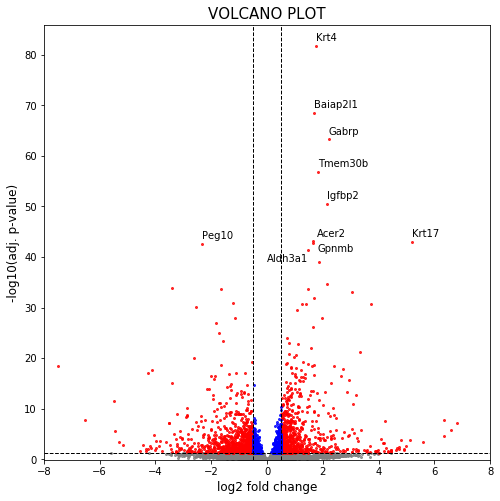

In [36]:
#PLOTING WITH TOP 10 P-VALS

%matplotlib inline

foldchange_cutoff = 0.5
adjp_cutoff = 0.05

adjp_cutoff = -math.log10(adjp_cutoff)

#group the data from the lists into tuples
g1 = (x_notsig, y_notsig)
g2 = (x_adj, y_adj)
g3 = (x_lowfold, y_lowfold)
#group that data into a tuple and define the colors for each
data = (g1, g2, g3)
colors = ('grey', 'red', 'blue')
#plt the figure
fig = plt.figure(figsize=(8,8))
#?
ax = fig.add_subplot(1, 1, 1)
#loop through the data and colors ploting each
for data, color, in zip(data, colors):
    x, y = data
    ax.scatter(x, y, s=4, alpha=0.8, c=color) #s=size 

#setup the lines for boundaries
adjp_line = mlines.Line2D([-8, 8], [adjp_cutoff, adjp_cutoff], linewidth=1, linestyle='--', color='black') #mlines.Line2D ([x1, x2], [y-inc at x1, y-inc at x2]) x1 and x2 should be the xlims for this use
foldchange_neg_line = mlines.Line2D([-foldchange_cutoff, -foldchange_cutoff], [-10, 100], linewidth=1, linestyle='--', color='black')
foldchange_pos_line = mlines.Line2D([foldchange_cutoff, foldchange_cutoff], [-10, 100],  linewidth=1, linestyle='--',color='black')

#add the top10 p-value annotations
for i in range(len(annotate)):
    if annotate[i] != 'Gpnmb' and annotate[i] != 'Acer2' and annotate[i] != 'Aldh3a1': #include this line if shit is on top of eachother #print(annotate) to get the list
        ax.annotate(annotate[i],
                    xy=(x_annotate[i], y_annotate[i]),
                    xytext=(x_annotate[i], y_annotate[i]+1)
                   )
#easy enough to shift the ones overlapping about
ax.text( 0, 39, 'Aldh3a1')
ax.text( 1.8, 41, 'Gpnmb')
ax.text( 1.8, 44, 'Acer2')
    
#add the lines to the plot
ax.add_line(adjp_line)
ax.add_line(foldchange_neg_line)
ax.add_line(foldchange_pos_line)

#adjust the value cutoffs    
plt.xlim(-8, 8)
plt.ylim(-0.1)

#add labels
plt.title('VOLCANO PLOT', fontsize=15)
plt.xlabel('log2 fold change', fontsize=12)
plt.ylabel('-log10(adj. p-value)', fontsize=12)

#save the figure
fig.savefig('test.pdf')

pass